# VocalPy :speech: :snake: in 15 minutes :clock:

First we download some example data.

In [1]:
!curl -sSL https://raw.githubusercontent.com/vocalpy/vak/main/src/scripts/download_autoannotate_data.py | python3 -

...100%, 116 MB, 13966 KB/s, 8 seconds passed

...100%, 77 MB, 10549 KB/s, 7 seconds passed


unpacking: /home/pimienta/Documents/repos/coding/vocalpy/vocalpy-notebooks/bfsongrepo/tars/sober.repo1.gy6or6.032212.wav.csv.tar.gz

unpacking: /home/pimienta/Documents/repos/coding/vocalpy/vocalpy-notebooks/bfsongrepo/tars/sober.repo1.gy6or6.032312.wav.csv.tar.gz


And move it into a data directory.

In [2]:
!mv bfsongrepo data

In [5]:
!pip install vocalpy

  Obtaining dependency information for vocalpy from https://files.pythonhosted.org/packages/69/13/fcf916e22cec10576129107353b2cb74f12746a24cc411e13642cc612e1a/vocalpy-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for crowsetta>=5.0.0 from https://files.pythonhosted.org/packages/cd/f5/a28ca95e0ee59749431d1931931e16f1c50efe8d997ab5e986bbde140c6b/crowsetta-5.0.1-py3-none-any.whl.metadata
  Using cached crowsetta-5.0.1-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for dask>=2.10.1 from https://files.pythonhosted.org/packages/f5/ec/3613b5221a015f54ff50a948029bbd7564e846a45178070feced8b9d105c/dask-2023.9.2-py3-none-any.whl.metadata
  Using cached dask-2023.9.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached evfuncs-0.3.5-py3-none-any.whl (9.4 kB)
  Obtaining dependency information for librosa>=0.10.0.post2 from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.wh

In [1]:
from __future__ import annotations

import attrs

import numpy as np
import vocalpy as voc

In [4]:
import vocalpy as voc

data_dir = ('data/bfsongrepo/gy6or6/032312/')

cbin_paths = voc.paths.from_dir(data_dir, 'cbin')
audios = [voc.Audio.read(cbin_path) for cbin_path in cbin_paths]
print(audios[0])

ModuleNotFoundError: No module named 'vocalpy'

In [5]:
import vocalpy as voc

data_dir = ('tests/data-for-tests/source/'
            'audio_wav_annot_birdsongrec/Bird0/Wave/')

wav_paths = voc.paths.from_dir(data_dir, 'wav')
audios = [voc.Audio.read(wav_path) for wav_path in wav_paths]
print(audios[0])

vocalpy.Audio(data=array([3.0517...66210938e-04]), samplerate=32000, channels=1), path=tests/data-for-tests/source/audio_wav_annot_birdsongrec/Bird0/Wave/0.wav)


In [6]:
import vocalpy as voc

data_dir = ('tests/data-for-tests/generated/'
            'spect_npz/')

spect_paths = voc.paths.from_dir(data_dir, 'wav.npz')
spects = [voc.Spectrogram.read(spect_path)
          for spect_path in spect_paths]

print(spects[0])

vocalpy.Spectrogram(data=array([[3.463...7970774e-14]]), frequencies=array([    0....7.5, 16000. ]), times=array([0.008,...7.648, 7.65 ]), path=PosixPath('tests/data-for-tests/generated/spect_npz/0.wav.npz'), audio_path=None)


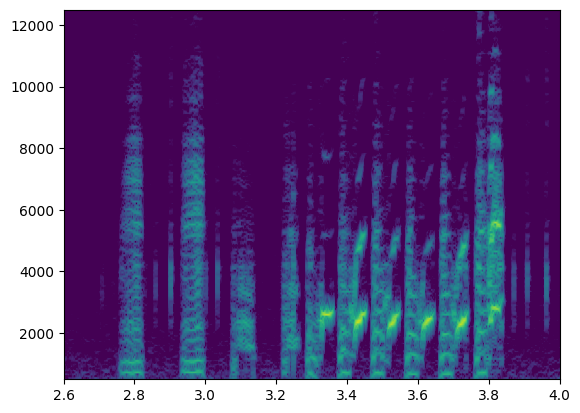

In [7]:
voc.plot.spectrogram(
    voc.Spectrogram(data=np.log(spects[1].data),
                    frequencies=spects[1].frequencies,
                    times=spects[1].times),
    tlim = [2.6, 4],
    flim=[500,12500],
    imshow_kwargs={'vmin':-25, 'vmax': -10}
)

In [8]:
import vocalpy as voc

data_dir = ('tests/data-for-tests/source/'
            'audio_cbin_annot_notmat/gy6or6/032312/')

notmat_paths = voc.paths.from_dir(data_dir, '.not.mat')
annots = [voc.Annotation.read(notmat_path, format='notmat') 
          for notmat_path in notmat_paths]
print(annots[1])

Annotation(data=Annotation(annot_path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin.not.mat'), notated_path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin'), seq=<Sequence with 57 segments>), path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin.not.mat'))


(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

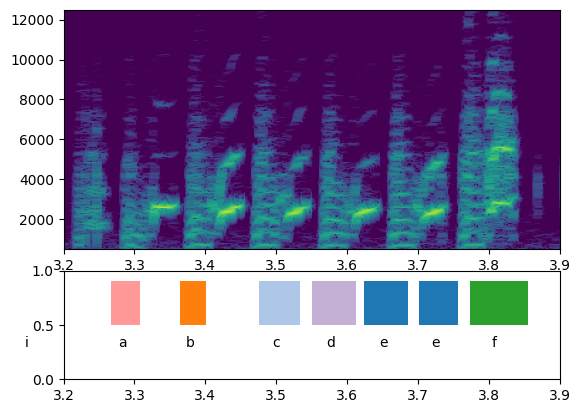

In [9]:
voc.plot.annotated_spectrogram(
    spect=voc.Spectrogram(data=np.log(spects[1].data),
                    frequencies=spects[1].frequencies,
                    times=spects[1].times),
    annot=annots[1],
    tlim = [3.2, 3.9],
    flim=[500,12500],
    imshow_kwargs={'vmin':-25, 'vmax': -10}
)

In [10]:
import evfuncs
import vocalpy as voc

data_dir = ('tests/data-for-tests/source/'
            'audio_cbin_annot_notmat/gy6or6/032312/')

cbin_paths = voc.paths.from_dir(data_dir, 'cbin')
audios = [voc.Audio.read(cbin_path) for cbin_path in cbin_paths]


segment_params = {
    'threshold': 1500,
    'min_syl_dur': 0.01,
    'min_silent_dur': 0.006,
}
segmenter = voc.Segmenter(
    # example of using a callback from another library
    callback=evfuncs.segment_song, 
    segment_params=segment_params
)

In [11]:
seqs = segmenter.segment(audios, parallelize=True)

print(seqs[1])

[########################################] | 100% Completed | 122.91 ms
Sequence(units=[Unit(onset=2.19075, offset=2.20428125, label='-', audio=None, spectrogram=None), Unit(onset=2.35478125, offset=2.38815625, label='-', audio=None, spectrogram=None), Unit(onset=2.8410625, offset=2.86715625, label='-', audio=None, spectrogram=None), Unit(onset=3.48234375, offset=3.49371875, label='-', audio=None, spectrogram=None), Unit(onset=3.57021875, offset=3.60296875, label='-', audio=None, spectrogram=None), Unit(onset=3.64403125, offset=3.67721875, label='-', audio=None, spectrogram=None), Unit(onset=3.72228125, offset=3.74478125, label='-', audio=None, spectrogram=None), Unit(onset=3.8036875, offset=3.8158125, label='-', audio=None, spectrogram=None), Unit(onset=3.82328125, offset=3.83646875, label='-', audio=None, spectrogram=None), Unit(onset=4.13759375, offset=4.16346875, label='-', audio=None, spectrogram=None), Unit(onset=4.80278125, offset=4.814, label='-', audio=None, spectrogram=None),